In [1]:
# %pip install universal-portfolios
%matplotlib inline

# hot reloading modules
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
# from pandas.io.data import DataReader
from datetime import datetime
# import six
import universal as up
from universal import tools
from universal import algos
import logging
# we would like to see algos progress
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.DEBUG)

import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['figure.figsize'] = (16, 10) # increase the size of graphs
# mpl.rcParams['legend.fontsize'] = 12
# mpl.rcParams['lines.linewidth'] = 1
# default_color_cycle = mpl.rcParams['axes.color_cycle'] # save this as we will want it back later

2019-11-19 22:40:15,245 Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import pandas as pd
import numpy as np
# import xarray as xr
import os

df = {}
closes = {}
for i in range(10):
    data = pd.read_csv('./data/'+str(i)+'.csv')
    code = data.Code.unique()[0]
    time = pd.to_datetime(data.Date)
    # print(time)
    closes[code] = data.Close

c = pd.DataFrame(closes)


In [3]:
c = c.drop(c.tail(2).index)
print(c.head())
print(c.tail())
print(c.shape)

   JM.DCE   P.DCE  I.DCE   Y.DCE   C.DCE  PP.DCE   M.DCE  EG.DCE   L.DCE  \
0  1371.5  4248.0  835.0  5422.0  1940.0  8847.0  2788.0  4483.0  8185.0   
1  1372.5  4248.0  838.0  5418.0  1940.0  8877.0  2784.0  4483.0  8190.0   
2  1374.0  4242.0  836.0  5414.0  1939.0  8869.0  2784.0  4478.0  8185.0   
3  1373.0  4248.0  836.0  5414.0  1939.0  8887.0  2782.0  4484.0  8185.0   
4  1374.0  4248.0  835.0  5420.0  1939.0  8886.0  2789.0  4486.0  8180.0   

    J.DCE  
0  2135.5  
1  2137.5  
2  2136.5  
3  2137.0  
4  2134.5  
       JM.DCE   P.DCE  I.DCE   Y.DCE   C.DCE  PP.DCE   M.DCE  EG.DCE   L.DCE  \
27010  1219.5  5232.0  619.0  6258.0  1889.0  7950.0  2878.0  4571.0  7235.0   
27011  1219.5  5234.0  619.0  6258.0  1890.0  7948.0  2877.0  4572.0  7230.0   
27012  1219.5  5236.0  618.5  6258.0  1890.0  7948.0  2871.0  4572.0  7225.0   
27013  1218.0  5232.0  619.0  6256.0  1890.0  7948.0  2871.0  4571.0  7225.0   
27014  1218.0  5238.0  618.0  6258.0  1891.0  7952.0  2872.0  4570.0  7

2019-11-19 22:40:16,136 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-11-19 22:40:16,137 findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,137 findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,140 findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,141 findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-19 22:40:16,142 findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,143 findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-19 22:40:16,144 findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-19 22

2019-11-19 22:40:16,235 findfont: score(<Font 'Arimo' (Arimo-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,236 findfont: score(<Font 'Cabin' (Cabin-MediumItalic.otf) italic normal medium normal>) = 11.145
2019-11-19 22:40:16,237 findfont: score(<Font 'STIXNonUnicode' (STIXNonUnicode-Bold.otf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,238 findfont: score(<Font 'STIXIntegralsUpD' (STIXIntegralsUpD-Bold.otf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,239 findfont: score(<Font 'Go' (Go-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,240 findfont: score(<Font 'Gentium Book Basic' (GenBkBasR.ttf) normal normal book normal>) = 10.05
2019-11-19 22:40:16,241 findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,242 findfont: score(<Font 'Accanthis ADF Std No3' (AccanthisADFStdNo3-Regular.otf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,242 fi

2019-11-19 22:40:16,351 findfont: score(<Font 'Baekmuk Dotum' (dotum.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,351 findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,352 findfont: score(<Font 'GFS Solomos' (GFSSolomos.otf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,358 findfont: score(<Font 'FreeMono' (FreeMonoOblique.otf) oblique normal 400 normal>) = 11.05
2019-11-19 22:40:16,359 findfont: score(<Font 'STIXSizeTwoSym' (STIXSizeTwoSym-Regular.otf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,361 findfont: score(<Font 'Go' (Go-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,362 findfont: score(<Font 'Linux Biolinum Keyboard O' (LinBiolinum_K.otf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,362 findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,363 findfo

2019-11-19 22:40:16,486 findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,487 findfont: score(<Font 'STIXVariants' (STIXVariants-Bold.otf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,487 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,489 findfont: score(<Font 'Noto Kufi Arabic' (NotoKufiArabic-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,491 findfont: score(<Font 'Noto Sans Bengali' (NotoSansBengali-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,492 findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-19 22:40:16,493 findfont: score(<Font 'Lato' (Lato-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-19 22:40:16,493 findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-LightItalic.ttf) italic

2019-11-19 22:40:16,568 findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,569 findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,570 findfont: score(<Font 'Noto Sans' (NotoSans-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,571 findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,574 findfont: score(<Font 'Noto Serif Georgian' (NotoSerifGeorgian-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,575 findfont: score(<Font 'Noto Sans Malayalam' (NotoSansMalayalam-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,576 findfont: score(<Font 'Tinos' (Tinos-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-19 22:40:16,577 findfont: score(<Font 'Padauk' (Padauk-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-19

2019-11-19 22:40:16,677 findfont: score(<Font 'AR PL KaitiM Big5' (bkai00mp.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,681 findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 0.5349999999999999
2019-11-19 22:40:16,682 findfont: score(<Font 'Tinos' (Tinos-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-19 22:40:16,683 findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,683 findfont: score(<Font 'Noto Serif' (NotoSerif-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,684 findfont: score(<Font 'Noto Sans Sinhala' (NotoSansSinhala-Regular.ttf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,686 findfont: score(<Font 'Roboto' (Roboto-LightItalic.ttf) italic normal light normal>) = 11.24
2019-11-19 22:40:16,687 findfont: score(<Font 'GFS Didot' (GFSDidotItalic.otf) italic normal 400 normal>) = 11.0

2019-11-19 22:40:16,784 findfont: score(<Font 'Asana Math' (Asana-Math.otf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,785 findfont: score(<Font 'Noto Serif' (NotoSerif-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,786 findfont: score(<Font 'EB Garamond Initials' (EBGaramond-Initials.otf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,787 findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-11-19 22:40:16,788 findfont: score(<Font 'Noto Sans Malayalam UI' (NotoSansMalayalamUI-Regular.ttf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,792 findfont: score(<Font 'Roboto' (Roboto-Medium.ttf) normal normal medium normal>) = 10.145
2019-11-19 22:40:16,793 findfont: score(<Font 'Gentium Book Basic' (GenBkBasI.ttf) italic normal book normal>) = 11.05
2019-11-19 22:40:16,794 findfont: score(<Font 'EB Garamond SC' (EBGaramondSC08-Regular.otf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,

2019-11-19 22:40:16,884 findfont: score(<Font 'FreeSans' (FreeSans.otf) normal normal 400 normal>) = 10.05
2019-11-19 22:40:16,884 findfont: score(<Font 'Noto Sans Kannada UI' (NotoSansKannadaUI-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,885 findfont: score(<Font 'Bold Oblique' (UniversalisADFStd-BoldOblique.otf) oblique normal bold normal>) = 11.335
2019-11-19 22:40:16,886 findfont: score(<Font 'Universalis ADF Std' (UniversalisADFStd-CondOblique.otf) oblique normal 400 condensed>) = 11.25
2019-11-19 22:40:16,887 findfont: score(<Font 'GFS Baskerville' (GFSBaskerville.otf) normal normal regular normal>) = 10.05
2019-11-19 22:40:16,891 findfont: score(<Font 'Linux Libertine O' (LinLibertine_RB.otf) normal normal bold normal>) = 10.335
2019-11-19 22:40:16,896 findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2019-11-19 22:40:16,897 findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Italic.ttf) italic normal 400 nor

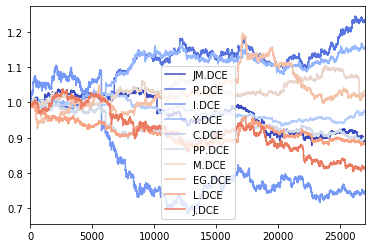

In [4]:
data = c/c.iloc[0]
data.plot()
plt.show()

## Leverage

Multiply price relatives with leverage ratios

In [5]:
# print(data.head())
# data['JM.DCE'] *= (100/15)   # Coking Coal
# data['P.DCE'] *= 10          # Palm Oil
# data['I.DCE'] *= (100/15)    # Iron ore
# data['Y.DCE'] *= 10          # Soybean Oil
# data['C.DCE'] *= 10          # Corn
# data['PP.DCE'] *= 10         # Polypropylene
# data['M.DCE'] *= (100/11)    # Soybean Meal
# data['EG.DCE'] *= (100/12)   # Ethylene Glycol
# data['L.DCE'] *= 10          # Plastic
# data['J.DCE'] *= (100/15)    # Coke
# print(data.head())

In [6]:
# print(result.summary())
# result.plot(weights=False, assets=False, ucrp=True, logy=True)

In [7]:
# swensen_allocation = [0.3, 0.15, 0.1, 0.15, 0.15, 0.15]  

#list all the algos
olps_algos = [
# algos.Anticor(),
algos.BAH(),
algos.BCRP(),
# algos.BNN(),
# algos.CORN(),
algos.CRP(), 
algos.CWMR(),
algos.EG(),
# algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
# algos.UP()
]

In [8]:
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos

In [9]:
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    olps_train.ix[name,'results'] = alg.run(data)

2019-11-19 22:40:18,311 Running BAH...
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algo.py:231: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  init_val = s.ix[s.first_valid_index()]
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algos/bah.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  w.ix[0] = 1./S.shape[1]
2019-11-19 22:40:18,341 BAH finished successfully.
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See t

252!!!!


2019-11-19 22:40:18,770 BCRP finished successfully.
2019-11-19 22:40:18,802 Running CRP...
2019-11-19 22:40:18,813 CRP finished successfully.
2019-11-19 22:40:18,853 Running CWMR...
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algo.py:91: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  B.ix[t] = last_b
2019-11-19 22:40:18,874 Progress: 0.0%...
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/algos/cwmr.py:90: RuntimeWarning: invalid value encountered in sqrt
  U_sqroot = 0.5 * (-lam * theta * V + sqrt(lam**2 * theta**2 * V**2 + 4*V))
2019-11-19 22:40:21,811 Progress: 10.0%...
2019-11-19 22:40:24,636 Progress: 20.0%...
2019-11-19 22:40:27,343 Progress: 30.0%...
2019-11-19 22:40:30,051 Progress: 40.0%...
2019-11-19 22:40:32,790 Progress: 50.0%...
2019-11

In [10]:
# Let's make sure the fees are set to 0 at first
for k, r in olps_train.results.iteritems():
#     print(k, r)
    r.fee = 1e-4

/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/universal/result.py:95: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  fees.iloc[0] = self.B.ix[0]


In [17]:
n_lines = 14
color_idx = np.linspace(0, 1, n_lines)
cmap = plt.cm.coolwarm
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))
plt.rc('axes', prop_cycle=(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines)))))
print(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines))))

cycler('color', [array([0.2298057 , 0.29871797, 0.75368315, 1.        ]), array([0.31883238, 0.42660505, 0.85985745, 1.        ]), array([0.41999071, 0.55298855, 0.94263034, 1.        ]), array([0.52713226, 0.6646996 , 0.98906465, 1.        ]), array([0.63008853, 0.75251624, 0.99850801, 1.        ]), array([0.73389779, 0.82001788, 0.97072437, 1.        ]), array([0.82678432, 0.85820536, 0.90695264, 1.        ]), array([0.90284867, 0.84479565, 0.81196983, 1.        ]), array([0.95456582, 0.77905456, 0.69253086, 1.        ]), array([0.96928857, 0.68498175, 0.56897533, 1.        ]), array([0.94945399, 0.57238791, 0.45344298, 1.        ]), array([0.89588459, 0.43307456, 0.33868063, 1.        ]), array([0.81061567, 0.26879706, 0.23542761, 1.        ]), array([0.70567316, 0.01555616, 0.15023281, 1.        ])])


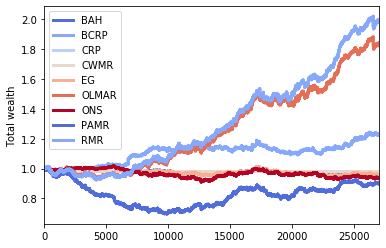

In [18]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_train.results[0].plot(assets=False, weights=False, ucrp=False, portfolio_label=olps_train.index[0])
# ax[1].set_prop_cycle(mpl.cycler(color=cmap(np.linspace(0, 1, n_lines))))
for k, r in olps_train.results.iteritems():
    if k == olps_train.results.keys()[0]: # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])
#plt.pca().get_lines()[0].set_color('red')
# plt.legend(loc='best')

In [15]:
def olps_stats(dff):
    df = pd.DataFrame()
    for name, r in dff.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
        df.ix[name, 'VaR(90%)'] = r.var90
        df.ix[name, 'VaR(95%)'] = r.var95
        df.ix[name, 'VaR(99%)'] = r.var99
    return df

In [16]:
olps_stats(olps_train)


/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-depre

252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!


/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/home/dex/anaconda3/envs/portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Rem

252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!
252!!!!


,profit,sharpe,information,annualized_return,drawdown_period,winning_pct,VaR(90%),VaR(95%),VaR(99%)
BAH,0.988735,-1.078334,0.723694,-9.908067,71.226667,49.476217,-0.000452,-0.000580,-0.000820
BCRP,1.033917,2.894400,3.756183,79.673394,26.113333,49.684851,-0.000936,-0.001203,-0.001705
CRP,0.987875,-1.175986,-23.200596,-10.943212,71.226667,49.468814,-0.000461,-0.000591,-0.000835
CWMR,0.898626,-1.449485,0.555217,-5.367265,89.050000,46.920290,-0.000178,-0.000228,-0.000323
EG,0.987907,-1.172226,-6.059230,-10.897608,71.226667,49.465112,-0.000460,-0.000590,-0.000834
OLMAR,1.076634,6.466260,7.913490,450.305780,24.253333,52.979971,-0.001207,-0.001555,-0.002209
ONS,0.986325,-1.365181,-1.011783,-16.932848,71.226667,49.442902,-0.000636,-0.000815,-0.001152
PAMR,0.987605,-1.150124,-0.818152,-25.721167,89.050000,47.993130,-0.001209,-0.001551,-0.002191
RMR,1.087414,7.341255,8.908196,592.383191,23.030000,52.869234,-0.001203,-0.001551,-0.002204
